## Exercise: Pandas & NumPy with Student Performance Dataset

You are provided with three separate datasets, all originally derived from a single dataset. However, these datasets have undergone slight modifications through different processes. Your task is to analyze the datasets, identify the differences, and correctly merge them back together.

**Important Notes**:
- Some column names have been changed and need to be translated back.
- Certain categorical variables have altered values (e.g., some categories have been renamed).
- Check the distribution of numerical variables, as there may be discrepancies.
- Missing values are present in multiple columns and need to be imputed appropriately. Justify your choice of imputation method.
- Some columns have been stored in different data types (e.g., numbers as strings). Ensure that data types are correct before merging the datasets.

Your Task:
1. Load all three datasets into Python.
2. Identify differences and discrepancies between the datasets.
3. Reconstruct the original dataset by:
    - Adjusting column names and data types.
    - Correctly merging the datasets.
    - Handling missing values (imputation) and justifying your chosen method.
4. Save the final dataset as Merged_StudentData.csv.
5. Perform hypothesis tests to analyze relationships between the following variables: `Sleep_Hours`, `Exam_Score`, `Internet_Access`, `Hours_Studied`, and `Tutoring_Sessions`.

In [1]:
import pandas as pd

# Load all three datasets
df1 = pd.read_csv("Student Data Part 1 mv.csv")
df2 = pd.read_csv("Student Data Part 2 mv.csv")
df3 = pd.read_csv("Student Data Part 3 mv.csv")

In [2]:
# Identify differences and discrpancies between datasets
# Check the column names
print(df1.columns.tolist())
print(df2.columns.tolist())
print(df3.columns.tolist())

['Student_ID', 'Study_Hours', 'Attendance', 'Rest_Hours', 'Parental_Involvement', 'Access_to_Resources']
['Unnamed: 0', 'Student_ID', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type']
['Student_ID', 'Final_Score', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


According to the output of Python, we can get following conclusions:
- Each dataset contains **only part of the information** about one student
- All datasets have the **same column "Student_ID"**, which can be used for **merging**
- Among all of the column names in three datasets, we can find out that there is an **unnecessory column "Unnamed: 0" in df2**, which should be **deleted**
- Some column names are **different from the variable names in hypothesis** and should be converted

In [3]:
# Identify differences and discrpancies between datasets
# Check the data type
print(df1.dtypes)
print(df2.dtypes)
print(df3.dtypes)

Student_ID                int64
Study_Hours               int64
Attendance                int64
Rest_Hours              float64
Parental_Involvement     object
Access_to_Resources      object
dtype: object
Unnamed: 0             int64
Student_ID             int64
Internet_Access       object
Tutoring_Sessions    float64
Family_Income         object
Teacher_Quality       object
School_Type           object
dtype: object
Student_ID                    int64
Final_Score                 float64
Parental_Education_Level     object
Distance_from_Home           object
Gender                       object
dtype: object


Acoording to the output of Python, we can get following conclusions:
- Data type of "Tutoring_Sessions" is **float64**, but it should be **int64** (As a student can't have 0.5 tutoring session)

In [4]:
# Identify differences and discrpancies between datasets
# Check missing data
print(df1.isnull().sum())
print(df2.isnull().sum())
print(df3.isnull().sum())

Student_ID                0
Study_Hours               0
Attendance                0
Rest_Hours              330
Parental_Involvement      0
Access_to_Resources       0
dtype: int64
Unnamed: 0             0
Student_ID             0
Internet_Access      281
Tutoring_Sessions    281
Family_Income          0
Teacher_Quality       66
School_Type            0
dtype: int64
Student_ID                    0
Final_Score                 330
Parental_Education_Level     90
Distance_from_Home           67
Gender                        0
dtype: int64


According to the output of Python, we can get following conclusions:
- In all 3 datasets, there are missings found in different columns (variables), but **df1 has the fewest missings**
- These missing values need to be treated appropriately before analysis (**median imputation** for **numerical** columns and **mode imputation** for **categorical** columns)

In [5]:
# Reconstruct the original datasets
# Adjusting column names
df1.rename(columns={
    "Study_Hours": "Hours_Studied",
    "Rest_Hours": "Sleep_Hours"
}, inplace=True)

df3.rename(columns={
    "Final_Score": "Exam_Score"
}, inplace=True)

# Delete unnecessory column in df2
df2 = df2.drop(columns=["Unnamed: 0"])

# Check if the column names are correctly converted and the unnecessory column is deleted
print(df1.columns.tolist())
print(df2.columns.tolist())
print(df3.columns.tolist())

['Student_ID', 'Hours_Studied', 'Attendance', 'Sleep_Hours', 'Parental_Involvement', 'Access_to_Resources']
['Student_ID', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type']
['Student_ID', 'Exam_Score', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


Note: As I **can't convert** the data type of "Tutoring_Sessions" when it has **missing values**, the convertion of its data type will be done **after merging and missing handling**

In [6]:
# Reconstruct the original datasets
# Merging the datasets on "Student_ID"
merged_df = df1.merge(df2, on="Student_ID", how="outer")
merged_df = merged_df.merge(df3, on="Student_ID", how="outer")

# Check the merged new dataset
merged_df.head()

Student_ID  Hours_Studied  Attendance  Sleep_Hours Parental_Involvement  \
0           1             23          84          8.0                  Low   
1           2             19          64          9.0                  Low   
2           3             24          98          8.0               Medium   
3           4             29          89          9.0                  Low   
4           5             19          92          7.0               Medium   

  Access_to_Resources Internet_Access  Tutoring_Sessions Family_Income  \
0                High       Available                0.0           Low   
1              Medium       Available                2.0        Medium   
2              Medium       Available                2.0        Medium   
3              Medium       Available                1.0        Medium   
4              Medium             NaN                NaN           NaN   

  Teacher_Quality School_Type  Exam_Score Parental_Education_Level  \
0          Medium      Public        65.0              High School   
1          Medium      Public        59.0                  College   
2          Medium      Public        72.0             Postgraduate   
3          Medium      Public        69.0              High School   
4             NaN         NaN        68.0                  College   

  Distance_from_Home  Gender  
0              Close    Male  
1             Medium  Female  
2              Close    Male  
3             Medium    Male  
4              Close  Female

In [7]:
# Handling missing values (imputation)
# For numeric values: median imputation
for col in ["Sleep_Hours", "Tutoring_Sessions", "Exam_Score"]:
    merged_df[col] = merged_df[col].fillna(merged_df[col].median())

# For categorical values: mode imputation
for col in ["Internet_Access", "Family_Income", "Teacher_Quality", "School_Type", "Parental_Education_Level", "Distance_from_Home"]:
    merged_df[col] = merged_df[col].fillna(merged_df[col].mode()[0])

# Check if the missing values are all imputated
print(merged_df.isnull().sum())

Student_ID                  0
Hours_Studied               0
Attendance                  0
Sleep_Hours                 0
Parental_Involvement        0
Access_to_Resources         0
Internet_Access             0
Tutoring_Sessions           0
Family_Income               0
Teacher_Quality             0
School_Type                 0
Exam_Score                  0
Parental_Education_Level    0
Distance_from_Home          0
Gender                      0
dtype: int64


In [8]:
# Reconstruct the merged dataset
# Adjusting data types
merged_df["Tutoring_Sessions"] = merged_df["Tutoring_Sessions"].astype(int)

# Check if the data types are correctly converted
print(merged_df.dtypes)

Student_ID                    int64
Hours_Studied                 int64
Attendance                    int64
Sleep_Hours                 float64
Parental_Involvement         object
Access_to_Resources          object
Internet_Access              object
Tutoring_Sessions             int64
Family_Income                object
Teacher_Quality              object
School_Type                  object
Exam_Score                  float64
Parental_Education_Level     object
Distance_from_Home           object
Gender                       object
dtype: object


In [9]:
# Save the final dataset as Merged_StudentData.csv
merged_df.to_csv("Merged_StudentData.csv")

# Check the new dataset
new_df = pd.read_csv("Merged_StudentData.csv")
new_df.head()

Unnamed: 0  Student_ID  Hours_Studied  Attendance  Sleep_Hours  \
0           0           1             23          84          8.0   
1           1           2             19          64          9.0   
2           2           3             24          98          8.0   
3           3           4             29          89          9.0   
4           4           5             19          92          7.0   

  Parental_Involvement Access_to_Resources Internet_Access  Tutoring_Sessions  \
0                  Low                High       Available                  0   
1                  Low              Medium       Available                  2   
2               Medium              Medium       Available                  2   
3                  Low              Medium       Available                  1   
4               Medium              Medium       Available                  1   

  Family_Income Teacher_Quality School_Type  Exam_Score  \
0           Low          Medium      Public        65.0   
1        Medium          Medium      Public        59.0   
2        Medium          Medium      Public        72.0   
3        Medium          Medium      Public        69.0   
4        Medium          Medium      Public        68.0   

  Parental_Education_Level Distance_from_Home  Gender  
0              High School              Close    Male  
1                  College             Medium  Female  
2             Postgraduate              Close    Male  
3              High School             Medium    Male  
4                  College              Close  Female

### Hypotheses testing

Hypothesis 1: There is a positive correlation between the number of hours of sleep (Sleep_Hours) and the exam grade (Exam_Score).
- Remove potential outliers (e.g. students who sleep extremely little or extremely much, i.e. top and bottom 3 %).
- First check whether the variables are normally distributed. If not, apply Spearman correlation.

In [10]:
from scipy.stats import shapiro, spearmanr, pearsonr

# Sleep_Hours (Rest_Hours) vs Exam_Score (Final_Score)
# Load the dataset
merged_df = pd.read_csv("Merged_StudentData.csv")

# Remove top and bottom 3% of Sleep_Hours
lower = merged_df["Sleep_Hours"].quantile(0.03)
upper = merged_df["Sleep_Hours"].quantile(0.97)
filtered = merged_df[(merged_df["Sleep_Hours"] >= lower) & (merged_df["Sleep_Hours"] <= upper)]

# Check for normality
shapiro_sleep = shapiro(merged_df["Sleep_Hours"])
shapiro_score = shapiro(merged_df["Exam_Score"])

# Choose correlation method
if shapiro_sleep.pvalue < 0.05 or shapiro_score.pvalue < 0.05:
    method = "Spearman"
    corr, p = spearmanr(filtered["Sleep_Hours"], filtered["Exam_Score"])
else:
    method = "Pearson"
    corr, p = pearsonr(filtered["Sleep_Hours"], filtered["Exam_Score"])

# Output results
print("Correlation method:", method)
print("Correlation coefficient:", corr)
print("P-value:", p)
print("Normality (Sleep_Hours):", shapiro_sleep.pvalue)
print("Normality (Exam_Score):", shapiro_score.pvalue)

Correlation method: Spearman
Correlation coefficient: -0.0022180341022189957
P-value: 0.8569519236445271
Normality (Sleep_Hours): 3.343330001787795e-42
Normality (Exam_Score): 4.54469168231018e-55


/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6607.
  res = hypotest_fun_out(*samples, **kwds)


Interpretation:
- Correlation coefficient: -0.0022180341022189957

The correlation coefficient is a negative value, which indicates there is a **negative** correlation between hours of sleep (Sleep_Hours) and the exam grade (Exam_Score). However, as the coefficient correlation is **very close to 0**, we can also claim that the correlation between these two variables is **very weak**. 
- P-value: 0.8569519236445271

As P-value is larger than 0.05, we can claim that the correlation between hours of sleep (Sleep_Hours) and the exam grade (Exam_Score) is **not stastically significant**

Conclusion:

There is **no stastically significant correlation** between the number of hours of sleep (Sleep_Hours) and the exam grade (Exam_Score)

Hypothesis 2: Students with Internet access (Internet_Access) spend more time studying (Hours_Studied) than students without Internet access.
- Create a boxplot for visualization and check for outliers.
- Remove extreme values according to boxplot definition.

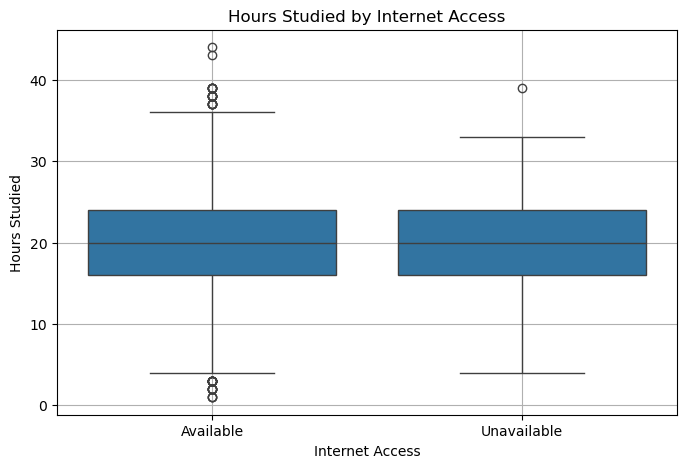

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Internet_Access vs Hours_Studied
# Load the dataset
merged_df = pd.read_csv("Merged_StudentData.csv")

# Boxplot for visualization
plt.figure(figsize=(8, 5))
sns.boxplot(x="Internet_Access", y="Hours_Studied", data=merged_df)
plt.title("Hours Studied by Internet Access")
plt.xlabel("Internet Access")
plt.ylabel("Hours Studied")
plt.grid(True)
plt.show()

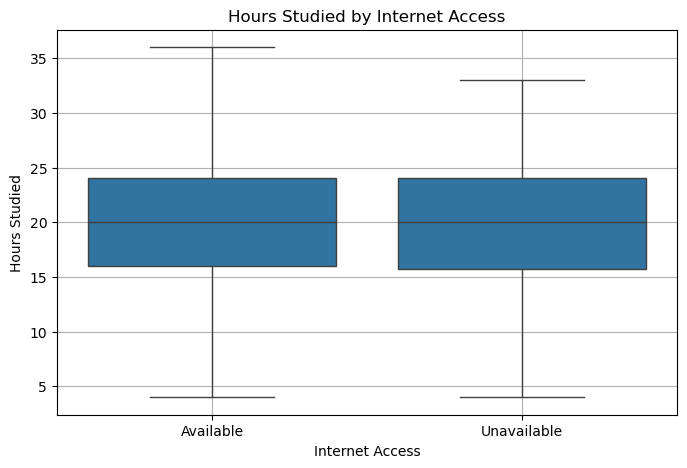

In [12]:
# Remove outliers based on IQR method
Q1 = merged_df["Hours_Studied"].quantile(0.25)
Q3 = merged_df["Hours_Studied"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_df = merged_df[(merged_df["Hours_Studied"] >= lower_bound) & (merged_df["Hours_Studied"] <= upper_bound)]

# Check if the outliers are successfully removed
plt.figure(figsize=(8, 5))
sns.boxplot(x="Internet_Access", y="Hours_Studied", data=filtered_df)
plt.title("Hours Studied by Internet Access")
plt.xlabel("Internet Access")
plt.ylabel("Hours Studied")
plt.grid(True)
plt.show()

In [13]:
# Grouped by Internet_Access
group_available = filtered_df.loc[filtered_df["Internet_Access"] == "Available"]["Hours_Studied"]
group_unavailable = filtered_df.loc[filtered_df["Internet_Access"] == "Unavailable"]["Hours_Studied"]

from scipy.stats import mannwhitneyu

# Mann-Whitney U test
U, P = mannwhitneyu(group_available, group_unavailable)

# Output results
print("Group with Internet access - Mean study hours:", group_available.mean())
print("Group without Internet access - Mean study hours:", group_unavailable.mean())
print("U statistic:", U)
print("P-value:", P)

Group with Internet access - Mean study hours: 19.978585334198574
Group without Internet access - Mean study hours: 19.825
U statistic: 1244657.0
P-value: 0.7465036698807448


Interpretation:
- Mean study hours

As the mean value in the group **without Internet access** is **higher** than the group **with Internet access**, we can say that **students with Internet access spend more time than students without it**. However, the difference in mean study hours between students with and without internet access is **very small (19.978585334198574 hours vs 19.825 hours)**, which in fact can also be seen as **no huge difference**
- P-value: 0.7465036698807448

As P-value is larger than 0.05, we can claim that there is **no stastically significant difference** in hours of study (Hours_Studied) between students with Internet access and students without Internet access

Conclusion:

There is **no stastically significant difference** in hours of study (Hours_Studied) between students with Internet access and students without Internet access

Hypothesis 3: Students who receive tutoring (Tutoring_Sessions) have higher exam grades than students without tutoring.

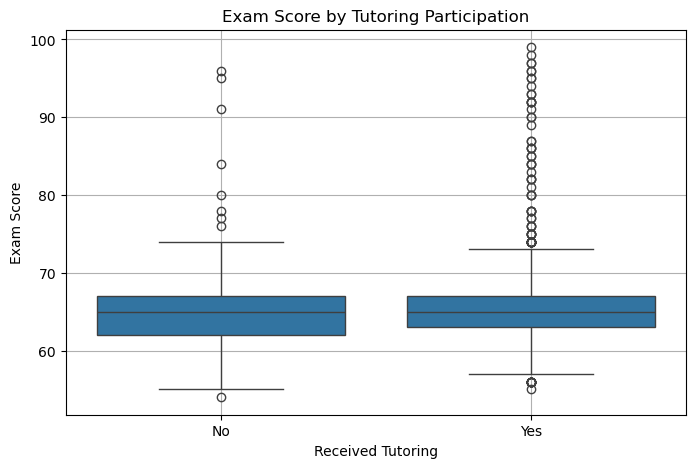

In [14]:
# Tutoring_Sessions vs Exam_Score
# Load the dataset
merged_df = pd.read_csv("Merged_StudentData.csv")

# Convert Tutoring_Sessions to binary: "Yes" (1 or more sessions) vs "No" (0 sessions)
merged_df["Received_Tutoring"] = merged_df["Tutoring_Sessions"].apply(lambda x: "Yes" if x > 0 else "No")

# Boxplot for visualization
plt.figure(figsize=(8, 5))
sns.boxplot(x="Received_Tutoring", y="Exam_Score", data=merged_df)
plt.title("Exam Score by Tutoring Participation")
plt.xlabel("Received Tutoring")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()

In [15]:
# Grouped by Received_Tutoring
group_tutored = merged_df[merged_df["Received_Tutoring"] == "Yes"]["Exam_Score"]
group_not_tutored = merged_df[merged_df["Received_Tutoring"] == "No"]["Exam_Score"]

# Mann–Whitney U test
U, P = mannwhitneyu(group_tutored, group_not_tutored)

# Output results
print("Group with tutoring - Mean exam score:", group_tutored.mean())
print("Group without tutoring - Mean exam score:", group_not_tutored.mean())
print("U statistic:", U)
print("P-value:", P)

Group with tutoring - Mean exam score: 65.38012999071495
Group without tutoring - Mean exam score: 64.55400981996726
U statistic: 3694716.5
P-value: 1.475533625501159e-11


Interpretation:
- Mean exam score

As the mean value in the group **with tutoring** is **higher** than the group **without tutoring**, we can say that **students who receive tutoring have higher exam grades than students without tutoring**. However, the difference in mean exam score between students with and without tutoring is **very small (65.38012999071495 vs 64.55400981996726)** and whether the difference is meaningful in practice is **debatable**
- P-value: 1.475533625501159e-11

As P-value is smaller than 0.05, we can claim that there is **stastically significant difference** in exam grades (Exam_Score) between students who receive tutoring and students without tutoring

Conclusion:

There is **stastically significant difference** in exam grades (Exam_Score) between students who receive tutoring and students without tutoring. However, whether the difference is meaningful in practice is **debatable**